In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn import neighbors
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML/ML Project/Electricity consumption data.csv")

In [ ]:
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.2,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.shape

(19735, 29)

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
for j in range(1,7):
    print(df.iloc[:, j].unique())

[  60   50   70  230  580  430  250  100   90   80  140  120  190  110
  400  390  240   40   30  310  380  370   20  260  500  450  220  170
  290  130  200  210  180  350  300  340  150  330  420  520  360  270
  550  690  620  610  490  410  320  740  910  510  790  460  160  480
  280  560 1080  750  470  440  800  540  530  660  630  600   10  570
  830 1070  890  590  850  710  680  670  780  640  650  700  770  720
  760  860  880  730  900  820  870  840]
[30 40 50 70 60 10 20  0]
[19.89       19.85666667 19.79       19.92666667 20.06666667 20.13333333
 20.26       20.42666667 20.56666667 20.73       20.85666667 20.89
 20.96333333 21.03333333 21.1        21.13333333 21.2        21.29
 21.35666667 21.39       21.5        21.53333333 21.6        21.26
 21.16666667 21.075      21.         20.92666667 20.79       20.7
 20.6        20.5        20.39       20.29       20.23       20.2
 20.16666667 20.1        20.03333333 20.         19.82333333 19.76
 19.7        19.73       19.96333

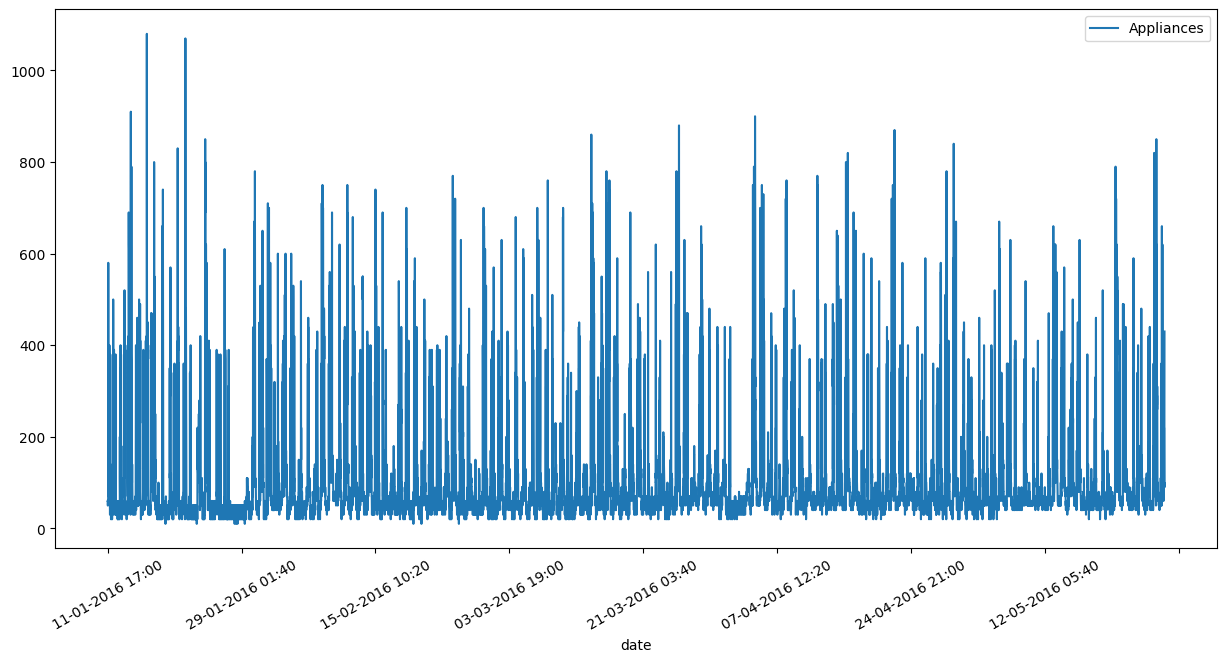

In [ ]:
df.plot(x='date', y='Appliances', figsize=(15,7), rot=30);

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df.date.dt.month
df['weekday'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['week'] = df.date.dt.week
df = df.drop(['date'], axis=1)

In [ ]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,11,1,17,44
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,11,1,17,44
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,11,1,17,44
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,11,1,17,44
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,11,1,17,44


In [ ]:
data_log_transformed = df.copy()
data_log_transformed['Appliances'] = np.log(data_log_transformed['Appliances'])

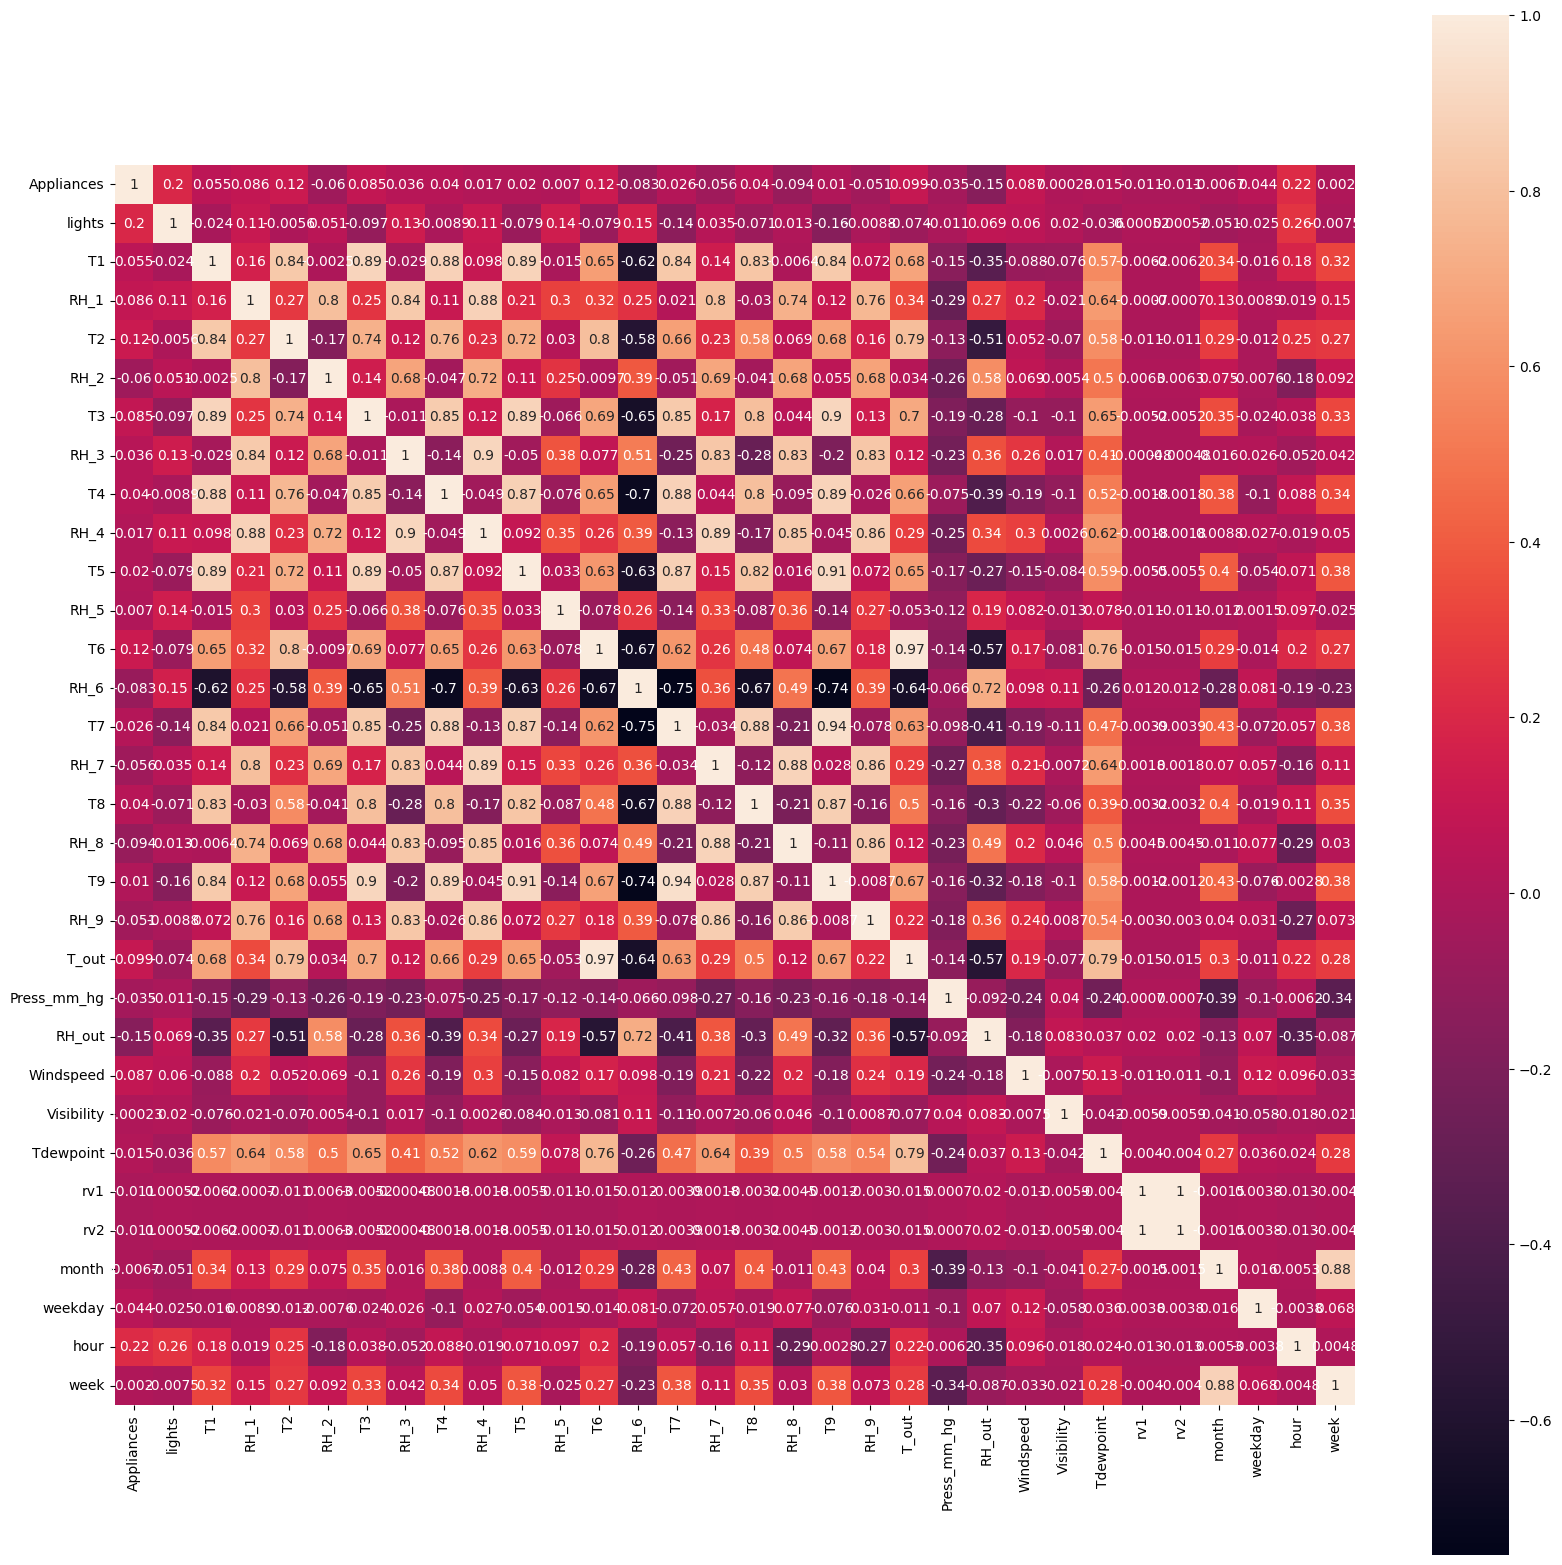

In [ ]:
corr_matrix = df.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, square=True);

In [ ]:
corr_matrix_transformed = data_log_transformed.corr()
corr_matrix_transformed.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week
Appliances,1.000000,0.261442,0.160747,0.084457,0.214756,-0.093674,0.167221,-0.006462,0.132359,-0.006533,0.110099,0.024312,0.196546,-0.174133,0.110415,-0.096231,0.153917,-0.165397,0.092553,-0.115582,0.176164,-0.072632,-0.226185,0.087722,-0.010970,0.056241,-0.010200,-0.010200,0.038737,0.063320,0.333394,0.038268
lights,0.261442,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521,-0.050865,-0.025336,0.255346,-0.007453
T1,0.160747,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203,0.335936,-0.016419,0.178858,0.319503
RH_1,0.084457,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699,0.134118,0.008917,0.018594,0.150030
T2,0.214756,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087,0.286658,-0.012287,0.254784,0.267094


In [ ]:
X_data = data_log_transformed.drop(columns=['Appliances'])
y_data = data_log_transformed[['Appliances']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)

In [ ]:
scaler = StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)
y_train_sc=scaler.fit_transform(y_train)
y_test_sc=scaler.transform(y_test)

In [ ]:
models = [
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()]
         ]


In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train_sc,y_train_sc)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train_sc,curr_model.predict(X_train_sc))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test_sc,curr_model.predict(X_test_sc))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test_sc,curr_model.predict(X_test_sc)))
    model_data.append(curr_model_data)

In [ ]:
model_data

[{'Name': 'DecisionTreeRegresson: ',
  'Train_Time': 0.7263331413269043,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.4395924321661576,
  'Test_RMSE_Score': 0.7591305488955318},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.007626771926879883,
  'Train_R2_Score': 0.6995419419665186,
  'Test_R2_Score': 0.5109519382617829,
  'Test_RMSE_Score': 0.7091534889494394},
 {'Name': 'RandomForest ',
  'Train_Time': 44.72000598907471,
  'Train_R2_Score': 0.9569946742665792,
  'Test_R2_Score': 0.6702498214652202,
  'Test_RMSE_Score': 0.5823136796079146},
 {'Name': 'AdaBoostRegressor: ',
  'Train_Time': 3.610530138015747,
  'Train_R2_Score': 0.17806845868285104,
  'Test_R2_Score': 0.1671193379676077,
  'Test_RMSE_Score': 0.9254561850285087},
 {'Name': 'GradientBoostingClassifier: ',
  'Train_Time': 10.855077266693115,
  'Train_R2_Score': 0.49325756429553336,
  'Test_R2_Score': 0.4422971162459455,
  'Test_RMSE_Score': 0.7572964447862138},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 12.1

In [ ]:
result_df = pd.DataFrame(model_data)

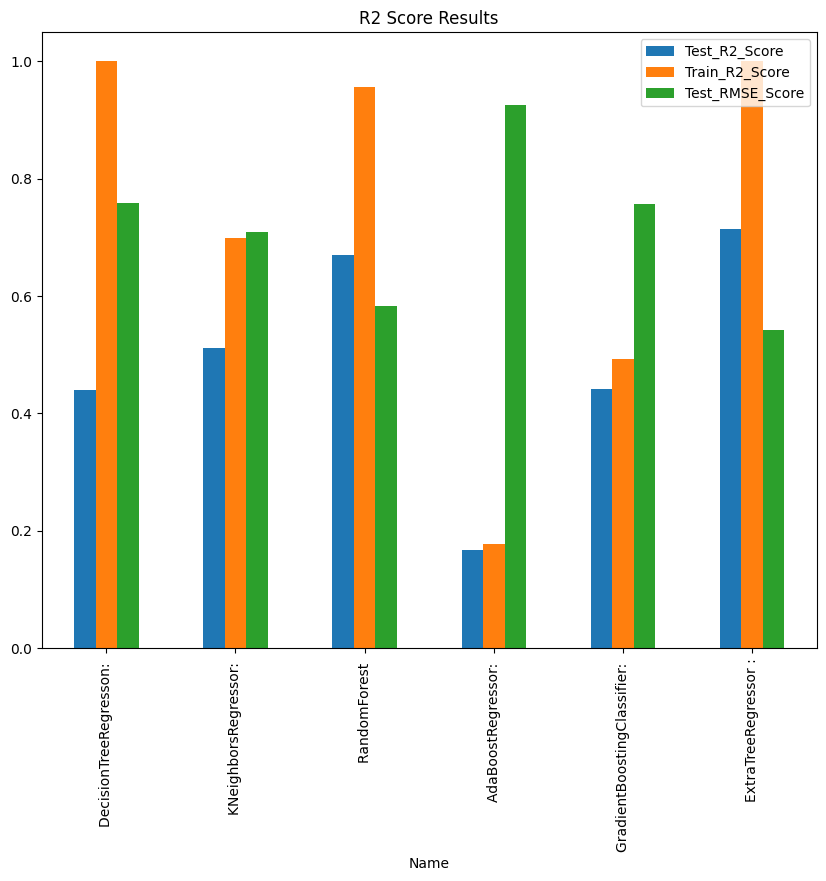

In [ ]:
result_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

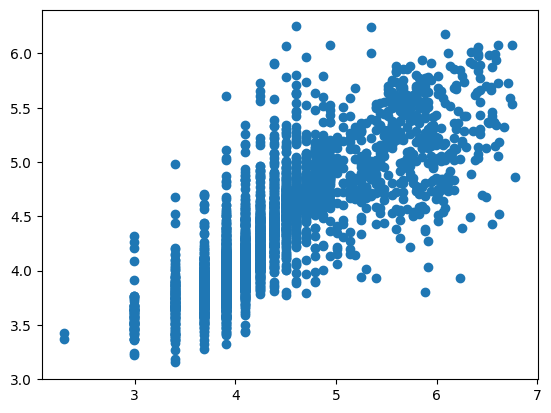

In [ ]:
reg_decision_model=RandomForestRegressor()
reg_decision_model.fit(X_train,y_train)
reg_decision_model.score(X_train,y_train)
reg_decision_model.score(X_test,y_test)
prediction=reg_decision_model.predict(X_test)
plt.scatter(y_test,prediction)

In [ ]:
parameters={
            "n_estimators": [100, 200, 1000]}
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuning_model.fit(X_data,y_data)
tuning_model.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .................n_estimators=100;, score=-0.495 total time=  35.5s
[CV 2/3] END .................n_estimators=100;, score=-0.299 total time=  36.0s
[CV 3/3] END .................n_estimators=100;, score=-0.481 total time=  36.7s
[CV 1/3] END .................n_estimators=200;, score=-0.524 total time= 1.2min
[CV 2/3] END .................n_estimators=200;, score=-0.299 total time= 1.2min
[CV 3/3] END .................n_estimators=200;, score=-0.490 total time= 1.2min
[CV 1/3] END ................n_estimators=1000;, score=-0.522 total time= 6.0min
[CV 2/3] END ................n_estimators=1000;, score=-0.298 total time= 5.9min
[CV 3/3] END ................n_estimators=1000;, score=-0.477 total time= 5.9min


-0.42486518395950396

In [ ]:
tuning_model.best_params_

{'n_estimators': 100}

In [ ]:
tuned_hyper_model= RandomForestRegressor(n_estimators=1000)

In [ ]:
tuned_hyper_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [ ]:
plt.scatter(y_test,tuned_pred)